In [1]:
import pandas as pd
import seaborn as sns
import pickle
import matplotlib
import numpy as np
from matplotlib import cm
%matplotlib inline
%load_ext autoreload
%autoreload 2
import glob

In [2]:
file_list = glob.glob('../repr_results/*agg_wmean_perm_num_5000.pkl')
file_list

['../repr_results/repr_res70_full_bonferroni_agg_wmean_perm_num_5000.pkl',
 '../repr_results/repr_res20_full_bonferroni_agg_wmean_perm_num_5000.pkl',
 '../repr_results/repr_res80_full_bonferroni_agg_wmean_perm_num_5000.pkl',
 '../repr_results/repr_res50_full_bonferroni_agg_wmean_perm_num_5000.pkl',
 '../repr_results/repr_res40_full_bonferroni_agg_wmean_perm_num_5000.pkl',
 '../repr_results/repr_res30_full_bonferroni_agg_wmean_perm_num_5000.pkl',
 '../repr_results/repr_res60_full_bonferroni_agg_wmean_perm_num_5000.pkl']

In [30]:
#for file_list[-3] in file_list:
#    with open(file, 'rb') as handle:
#        res_dict = pickle.load(handle)
#res_dict['fdr']['fdr_by']
file_list[0].split('_')[-4]

'max'

In [43]:
def create_dfs(file_list):
    prefix = file_list[0].split('_')[-4]
    df_list_power = []
    df_list_fdr = []
    df_list_count = []
    for file in file_list:
        with open(file, 'rb') as handle:
            res_dict = pickle.load(handle)
            df = pd.DataFrame(res_dict['power'])
            df['sample_size']=res_dict['sample_size']
            df_list_power.append(df)
            df = pd.DataFrame(res_dict['fdr'])
            df['sample_size']=res_dict['sample_size']
            df_list_fdr.append(df)
            df = pd.DataFrame(res_dict['count'])
            df['sample_size']=res_dict['sample_size']
            df_list_count.append(df)
    power_df = pd.concat(df_list_power)
    fdr_df = pd.concat(df_list_fdr)
    count_df  = pd.concat(df_list_count)
    for df in [power_df, fdr_df, count_df]:
        df.rename(columns={'np': f'np_{prefix}'}, inplace=True)
    return power_df, fdr_df, count_df


In [46]:
df_list_power = []
df_list_fdr = []
df_list_count = []
for prefix in ['max', 'wmean']:
    file_list = glob.glob(f'../repr_results/*agg_{prefix}_perm_num_5000.pkl')
    power_df, fdr_df, count_df = create_dfs(file_list)
    df_list_power.append(power_df)
    df_list_fdr.append(fdr_df)
    df_list_count.append(count_df)
power_df = pd.concat(df_list_power)
fdr_df = pd.concat(df_list_fdr)
count_df  = pd.concat(df_list_count)

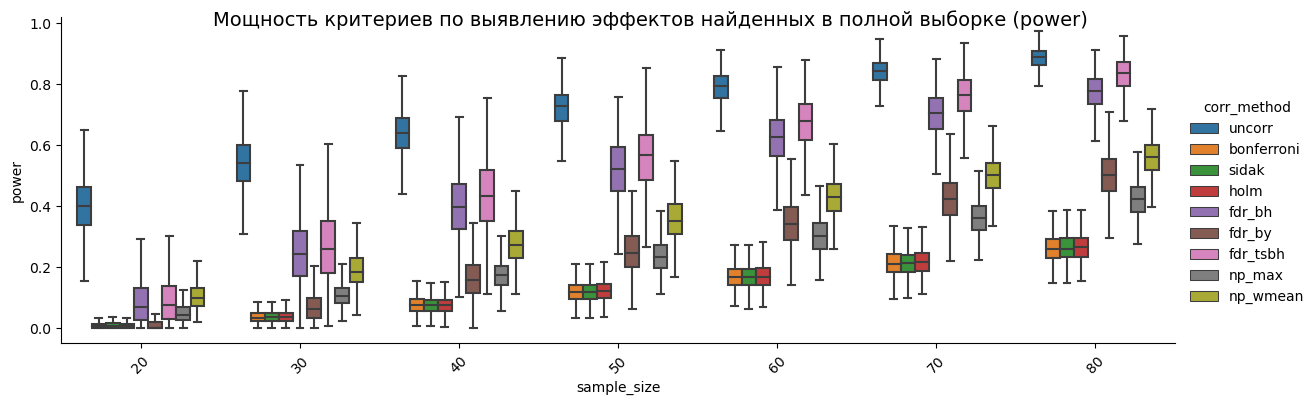

In [47]:
melted_df = power_df.melt(var_name='corr_method', value_name='power', id_vars = ['sample_size'])
g = sns.catplot(x = 'sample_size',y = 'power', hue = 'corr_method', data= melted_df, kind = 'box', 
                height=4, aspect=3, showfliers = False)
g.set_xticklabels(rotation=45);
g.fig.suptitle('Мощность критериев по выявлению эффектов найденных в полной выборке (power)', fontsize=14);

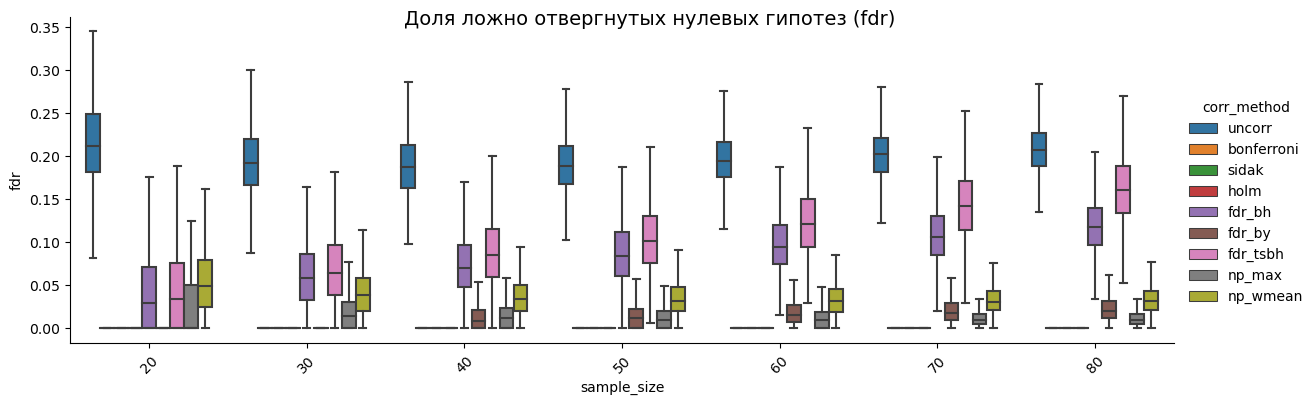

In [48]:
melted_df = fdr_df.melt(var_name='corr_method', value_name='fdr', id_vars = ['sample_size'])
g = sns.catplot(x = 'sample_size',y = 'fdr', hue = 'corr_method', data= melted_df, kind = 'box', 
                height=4, aspect=3, showfliers = False)
g.set_xticklabels(rotation=45);
g.fig.suptitle('Доля ложно отвергнутых нулевых гипотез (fdr)', fontsize=14);


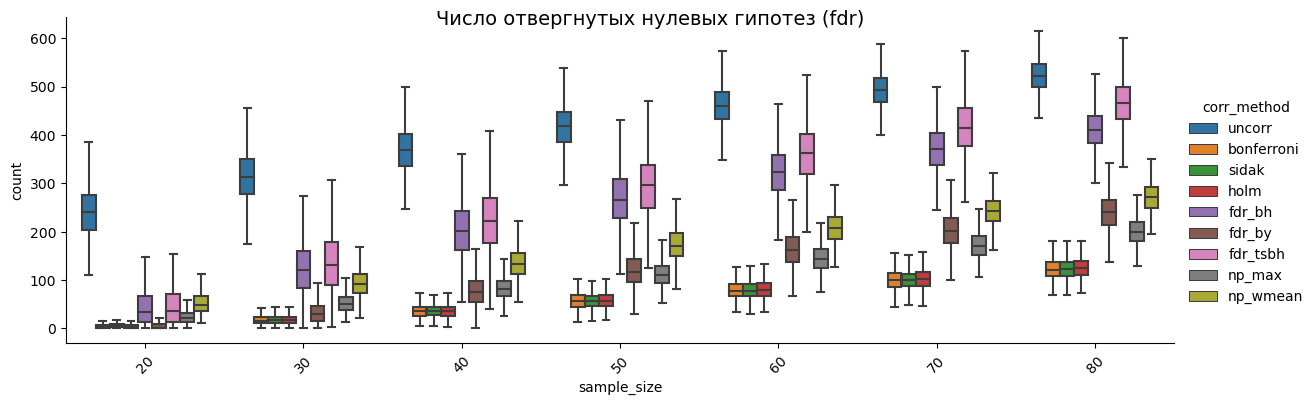

In [49]:
melted_df = count_df.melt(var_name='corr_method', value_name='count', id_vars = ['sample_size'])
g = sns.catplot(x = 'sample_size',y = 'count', hue = 'corr_method', data= melted_df, kind = 'box', 
                height=4, aspect=3, showfliers = False)
g.set_xticklabels(rotation=45);
g.fig.suptitle('Число отвергнутых нулевых гипотез (fdr)', fontsize=14);

In [19]:
file_list = glob.glob('../repr_results/*agg_max_perm_num_5000.pkl')
file_list

['../repr_results/repr_res70_full_bonferroni_agg_max_perm_num_5000.pkl',
 '../repr_results/repr_res50_full_bonferroni_agg_max_perm_num_5000.pkl',
 '../repr_results/repr_res60_full_bonferroni_agg_max_perm_num_5000.pkl',
 '../repr_results/repr_res40_full_bonferroni_agg_max_perm_num_5000.pkl',
 '../repr_results/repr_res20_full_bonferroni_agg_max_perm_num_5000.pkl',
 '../repr_results/repr_res80_full_bonferroni_agg_max_perm_num_5000.pkl',
 '../repr_results/repr_res30_full_bonferroni_agg_max_perm_num_5000.pkl']

In [20]:
power_df, fdr_df, count_df = create_dfs(file_list)

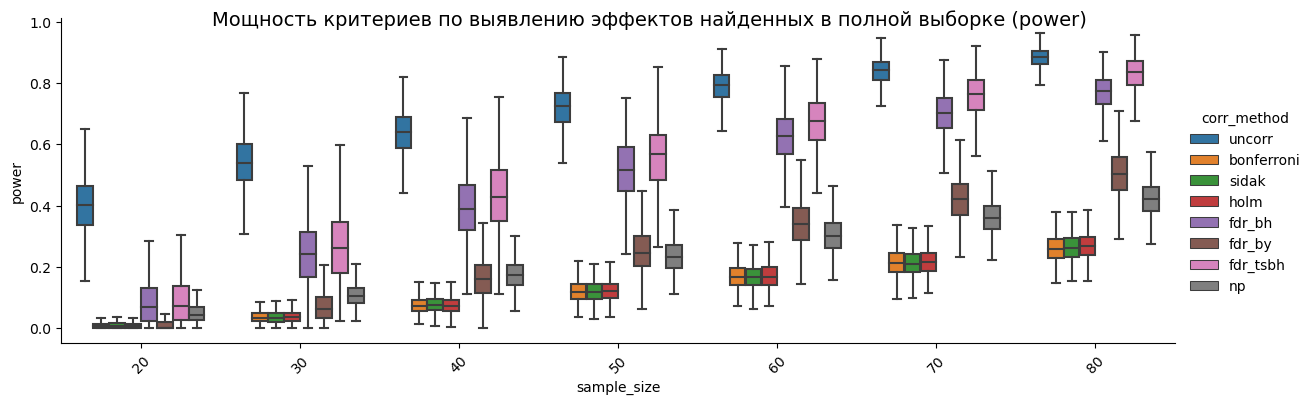

In [21]:
melted_df = power_df.melt(var_name='corr_method', value_name='power', id_vars = ['sample_size'])
g = sns.catplot(x = 'sample_size',y = 'power', hue = 'corr_method', data= melted_df, kind = 'box', 
                height=4, aspect=3, showfliers = False)
g.set_xticklabels(rotation=45);
g.fig.suptitle('Мощность критериев по выявлению эффектов найденных в полной выборке (power)', fontsize=14);

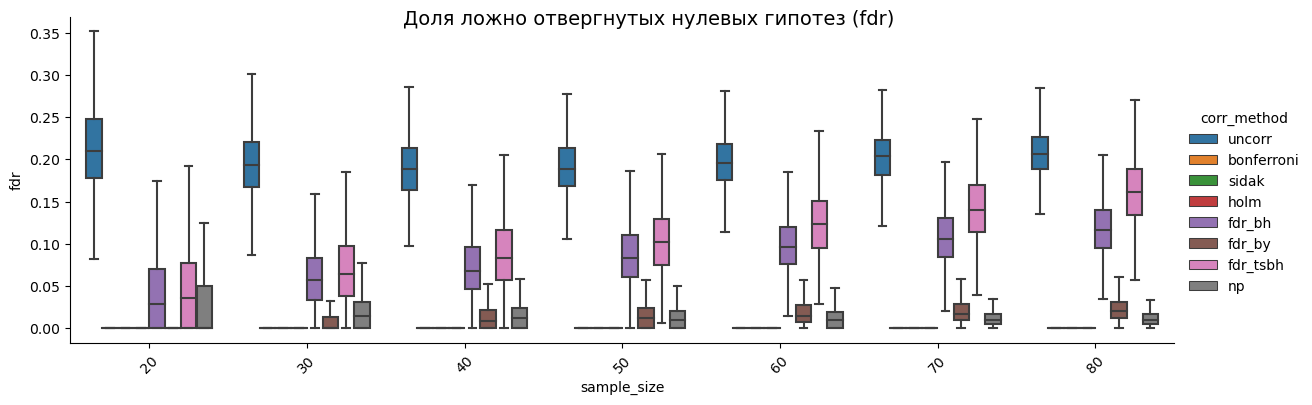

In [22]:
melted_df = fdr_df.melt(var_name='corr_method', value_name='fdr', id_vars = ['sample_size'])
g = sns.catplot(x = 'sample_size',y = 'fdr', hue = 'corr_method', data= melted_df, kind = 'box', 
                height=4, aspect=3, showfliers = False)
g.set_xticklabels(rotation=45);
g.fig.suptitle('Доля ложно отвергнутых нулевых гипотез (fdr)', fontsize=14);


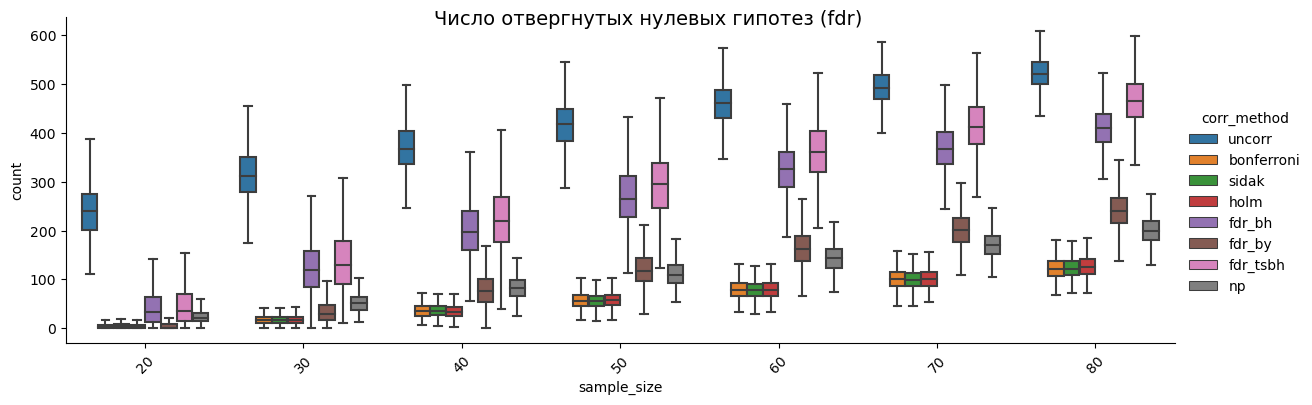

In [23]:
melted_df = count_df.melt(var_name='corr_method', value_name='count', id_vars = ['sample_size'])
g = sns.catplot(x = 'sample_size',y = 'count', hue = 'corr_method', data= melted_df, kind = 'box', 
                height=4, aspect=3, showfliers = False)
g.set_xticklabels(rotation=45);
g.fig.suptitle('Число отвергнутых нулевых гипотез (fdr)', fontsize=14);